# Project: Wrangling and Analyze Data

## Import Libaries

In [3]:
# Importing libraries.

# Importing pandas to work with DataFrames.
import pandas as pd

# Importing numpy.
import numpy as np

# Importing the matplotlib to create graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Import seaborn to better the visualization
import seaborn as sns

# Importing OS package to write and open files.
import os

# Importing the requests to create a object from a given URL.
import requests

# Importing the time package to calculate the elapse time to access the Twitter API
import time
from timeit import default_timer as timer

# Importing the json package
import json

# Importing the re package to use the regular expressions.
import re

# Importing the package to display images
from IPython.display import Image

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [9]:
#Source: https://reqbin.com/code/python/6mwlgbqa/python-requests-download-file-example#:~:text=To%20download%20a%20file%20using,the%20Python%20file%20object%20methods.m

# Download file using Requests library via URL provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save the file 
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read TSV file
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')

In [14]:
df_image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Note: After the data was read, it was saved to a csv file to be easily recalled when running the code for later testing as running the API query takes 20-30 minutes, hence this code is not active:

Create a function for tweet extraction, code provided by Udacity

To prevent spending 30 mins requierying everytime I open the notebook a local copy was saved into a csv and read when reopening the notebook.

In [4]:
#tweets_full_df.to_csv('json_raw_tweet_data.csv')

In [5]:
tweets_full_df = pd.read_csv('json_raw_tweet_data.csv')

In [6]:
tweets_full_df.head(1)

,Unnamed: 0,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",32845,False,This is Phineas. He's a mystical boy. Only eve...,...,NaN,NaN,NaN,NaN,6857,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.


* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.



#### df_archive

In [7]:
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_archive.retweeted_status_id.value_counts(); #need to remove these rows later

In [10]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_archive.text.sample(3)

1676    I'm not sure what this dog is doing but it's p...
578     Say hello to Mauve and Murphy. They're rather ...
557     Meet Sonny. He's an in-home movie critic. That...
Name: text, dtype: object

In [12]:
df_archive.text[801]

'Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn'

In [13]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Toby          7
Buddy         7
an            7
Daisy         7
Bailey        7
Koda          6
Stanley       6
Milo          6
Leo           6
Jack          6
Jax           6
Bella         6
Scout         6
Rusty         6
Dave          6
Oscar         6
Chester       5
           ... 
Amber         1
Zuzu          1
Lilli         1
Mo            1
Daniel        1
Dunkin        1
Lolo          1
Noah          1
Cheryl        1
Mya           1
Mark          1
Skye          1
Jareld        1
Theo          1
River         1
Noosh         1
Colin         1
Georgie       1
Willie        1
Gilbert       1
Ambrose       1
Chase         1
Akumi         1
Venti         1
this          1
Schnozz       1
Eleanor       1
Ashleigh      1
Brownie       1
Tuco          1
Name: name, Length: 957,

- Most names aren't identified in this df
- "a", "the" and "an" are incorrect

#### df_image

In [14]:
df_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [15]:
df_image.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


- 2075 rows

#### df_tweets

In [17]:
tweets_full_df.head()

,Unnamed: 0,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",32845,False,This is Phineas. He's a mystical boy. Only eve...,...,NaN,NaN,NaN,NaN,6857,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",28380,False,This is Tilly. She's just checking pup on you....,...,NaN,NaN,NaN,NaN,5168,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21321,False,This is Archie. He is a rare Norwegian Pouncin...,...,NaN,NaN,NaN,NaN,3410,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",35800,False,This is Darla. She commenced a snooze mid meal...,...,NaN,NaN,NaN,NaN,7068,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",34223,False,This is Franklin. He would like you to stop ca...,...,NaN,NaN,NaN,NaN,7574,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [18]:
tweets_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 33 columns):
Unnamed: 0                       2325 non-null int64
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2325 non-null object
display_text_range               2325 non-null object
entities                         2325 non-null object
extended_entities                2055 non-null object
favorite_count                   2325 non-null int64
favorited                        2325 non-null bool
full_text                        2325 non-null object
geo                              0 non-null float64
id                               2325 non-null int64
id_str                           2325 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null 

In [19]:
tweets_full_df.quoted_status_id.value_counts()

8.065709e+17    1
8.761630e+17    1
7.061659e+17    1
8.860534e+17    1
8.464848e+17    1
7.099191e+17    1
8.460885e+17    1
8.239662e+17    1
8.044179e+17    1
8.556564e+17    1
8.322683e+17    1
7.961237e+17    1
8.413114e+17    1
8.389487e+17    1
7.251361e+17    1
7.719056e+17    1
8.710758e+17    1
8.839657e+17    1
7.888183e+17    1
7.166371e+17    1
8.664587e+17    1
8.785999e+17    1
6.721083e+17    1
8.744134e+17    1
7.591676e+17    1
Name: quoted_status_id, dtype: int64

- Created at has date and time stamp, would be better as just a date
- Columns: contributors, coordinates, geo, place - delete

Contains unnecessary data:
- Only need Likes, retweets, favourite data.

Tweets ID column can be used to merge data frames together.

### Observations

1) Don't need retweets data so remove these rows from data frame

2) Too many columns which aren't needed

3) Ensure time stamp is correctly displayed

4) Ensure tweet_id's are string

5) Merge data frames

6) Create 1 column for dog type (i.e. pupper)

7) Correct/ remove incorrect names

8) Standardise dog ratings - possibly represent as a % in one column

9) Use image prediction to create new dog_breed column

10) Dataset contains data beyond 08/01/2017

11) Some names are 'a', 'an', and 'the'


### Quality issues

1. Remove retweet columns

2. Ensure time stamp is correctly displaced

3. Ensure tweet_id's are string

4. Ensure source column's data type is string

5. Ignore data beyond 08/01/2017

6. Create a consistant rating score

7. Some names such as: 'a', 'an', and 'the' need to be removed

8. Source column has characters before source which should be removed

### Tidiness issues
1. Merge columns to only have 1 column for dog type (i.e. pupper)

2. Remove columns not needed (i.e. retweet related columns)

3. Concatinate the dataframes

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make copies of original pieces of data
archive_clean_df = df_archive.copy()
image_clean_df = df_image.copy()
json_clean_df = tweets_full_df.copy()

### Issue #1: Remove retweet rows

Drop function is used to delete retweet & quote tweet data as these aren't needed for analysis.
- From archive data, retweeted_status_id was used

In [21]:
# Drop rows with values
archive_clean_df = archive_clean_df[archive_clean_df.retweeted_status_id.isnull()]

In [22]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

2356 - 181 = 2175, therefore the 181 rows of incorrect retweet data have been removed

- Repeat for json_clean_df dataframe using quoted_status_id column since qt's function similar to rt's

In [23]:
# Drop rows with values
json_clean_df = json_clean_df[json_clean_df.quoted_status_id.isnull()]

In [24]:
json_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 0 to 2324
Data columns (total 33 columns):
Unnamed: 0                       2300 non-null int64
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2300 non-null object
display_text_range               2300 non-null object
entities                         2300 non-null object
extended_entities                2055 non-null object
favorite_count                   2300 non-null int64
favorited                        2300 non-null bool
full_text                        2300 non-null object
geo                              0 non-null float64
id                               2300 non-null int64
id_str                           2300 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null 

Quote tweet rows have been removed as well!

### Issue #2: Remove excess columns (Tidiness issue)

Remove columns not needed for analysis such as retweets

In [25]:
json_clean_df.head(3);

In [26]:
#tweets_full_df.drop(tweets_full_df.columns[[0, 1, 2, 5, 6, 9]], axis=1, inplace=True)


In [27]:
#tweets_full_df.drop(['id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 
#'in_reply_to_status_id_str', 'quoted_status_permalink', 'source', 'truncated', 'user'], axis=1)


In [28]:
json_clean_df = json_clean_df[['id', "created_at", 'favorite_count', 'retweet_count']]
json_clean_df.rename(columns = {'id':'tweet_id'}, inplace = True)
json_clean_df.head(3)

,tweet_id,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,32845,6857
1,892177421306343426,2017-08-01 00:17:27,28380,5168
2,891815181378084864,2017-07-31 00:18:03,21321,3410


In [29]:
image_clean_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [30]:
archive_clean_df.head(3);

In [31]:
archive_clean_df = archive_clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

### Issue #3: Fix incorrect data type (Timestamp)

In [64]:
archive_clean_df.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
30     2017-07-15 16:51:35
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

In [62]:
archive_clean_df.timestamp = pd.to_datetime(archive_clean_df.timestamp)


In [1]:
#df['timestamp'] = df.datetime.date.today()

### Issue #4: Fix incorrect data types (ID)

In [33]:
image_clean_df.tweet_id = image_clean_df.tweet_id.astype('object')

json_clean_df.tweet_id = json_clean_df.tweet_id.astype('object')

archive_clean_df.tweet_id = archive_clean_df.tweet_id.astype('object')


### Issue #5: Fix incorrect data type (Source)

In [34]:
archive_clean_df.source = archive_clean_df.source.astype("category")


### Issue #6: Create one column for different dog types (Tidness issue)

In [35]:
archive_clean_df.info; # doggo, floofer, pupper, puppo

In [36]:
# List of columns
cols = ["doggo", "floofer", "pupper", "puppo"]
# Replace 'None' with blank
archive_clean_df[cols] = archive_clean_df[cols].replace("None", "")

# Combine the values, then format them accordingly for better readbility
archive_clean_df["Type"] = archive_clean_df.doggo + archive_clean_df.floofer + archive_clean_df.pupper + archive_clean_df.puppo
    

In [37]:
# Remove old columns
archive_clean_df.drop(columns=cols, inplace=True)

In [38]:
archive_clean_df.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Type
127,867900495410671616,2017-05-26 00:29:37,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,https://twitter.com/dog_rates/status/867900495...,12,10,None,
2174,669216679721873412,2015-11-24 18:11:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,https://twitter.com/dog_rates/status/669216679...,8,10,Clarq,
2295,667119796878725120,2015-11-18 23:18:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He is a southern Baklava. Gabe h...,https://twitter.com/dog_rates/status/667119796...,10,10,Gabe,


### Issue #7: Don't need data beyond 08/01/2017

In [39]:
# Filter data to exclude records beyond 08/02/2017
before_count = len(archive_clean_df)
archive_clean_df = archive_clean_df[(archive_clean_df.timestamp < "08/02/2017")]

after_count = len(archive_clean_df)
removed = before_count - after_count


In [40]:
# Repeat for JSON
#before_count_j = len(json_clean_df)
#json_clean_df = json_clean_df[(json_clean_df.timestamp < "08/01/2017")]

#after_count_j = len(json_clean_df)
#removed_j = before_count_j - after_count_j
#removed_j


### Issue #8: Uniform Ratings (as a % score)

This is done as beforehand the denominators were not the same throughout the data frame

In [41]:
archive_clean_df['Rating %'] = 100*archive_clean_df['rating_numerator'] / archive_clean_df['rating_denominator']

In [42]:
archive_clean_df = archive_clean_df.drop(['rating_numerator', 'rating_denominator'], axis=1)

In [43]:
archive_clean_df.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,name,Type,Rating %
1323,706265994973601792,2016-03-05 23:51:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,https://twitter.com/dog_rates/status/706265994...,Kara,,110.0
1286,708400866336894977,2016-03-11 21:15:02,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,https://vine.co/v/iHFqnjKVbIQ,None,,120.0


### Issue #9: Concatinate the dataframes into one dataframe (Tidiness issue)

In [44]:
df = pd.concat([archive_clean_df, image_clean_df, json_clean_df], join='outer', axis=1)

In [45]:
df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,Type,Rating %,tweet_id,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,130.0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,892420643555336193,2017-08-01 16:23:56,32845.0,6857.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,130.0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,892177421306343426,2017-08-01 00:17:27,28380.0,5168.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,120.0,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,malinois,0.138584,True,bloodhound,0.116197,True,891815181378084864,2017-07-31 00:18:03,21321.0,3410.0


### Issue #10: Values in 'source' column are hyperlinks instead of URLs

In [46]:
df.info;  #2295 expanded urls but 2356 data points in source (urls) column, source column will be used as main url column

Currently source column has hyperlink characters before the url link. These characters shall be removed

In [47]:
df.source[3] #before

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [48]:
#Multiple sources which put me on the right path, some sources include: https://gist.github.com/guillaumepiot/4539986 ; https://stackoverflow.com/questions/47275938/convert-hyperlink
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 
df.source = df.source.str.extract(pattern, expand=False)


In [49]:
df.source[3] #after

'http://twitter.com/download/iphone'

In [50]:
df.expanded_urls[3]

'https://twitter.com/dog_rates/status/891689557279858688/photo/1'

In [51]:
Image(url = 'https://twitter.com/dog_rates/status/891689557279858688/photo/1')

### Issue #11: Remove potential duplicate columns (Tidiness)

In [67]:
df.columns;

In [68]:
# Reference: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
df = df.loc[:,~df.columns.duplicated()]

In [69]:
df.columns;

Duplicate tweet_id's removed

### Issue #12: Some names such as: 'a', 'an', and 'the' need to be removed

In [70]:
df.name.value_counts();

In [71]:
df['name'] = df.name.replace(['None', 'a', 'an','the'], '' , inplace = True)

Check:

In [72]:
df[df['name']==('the')]

,tweet_id,timestamp,source,text,expanded_urls,name,Type,Rating %,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,favorite_count,retweet_count


- 0 rows as expected!

## Final Check

In [73]:
df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,Type,Rating %,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,None,,130.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2017-08-01 16:23:56,32845.0,6857.0
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,None,,130.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,2017-08-01 00:17:27,28380.0,5168.0
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,None,,120.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,...,True,malinois,0.138584,True,bloodhound,0.116197,True,2017-07-31 00:18:03,21321.0,3410.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id          2175 non-null object
timestamp         2175 non-null datetime64[ns]
source            2175 non-null object
text              2175 non-null object
expanded_urls     2117 non-null object
name              0 non-null object
Type              2175 non-null object
Rating %          2175 non-null float64
jpg_url           2075 non-null object
img_num           2075 non-null float64
p1                2075 non-null object
p1_conf           2075 non-null float64
p1_dog            2075 non-null object
p2                2075 non-null object
p2_conf           2075 non-null float64
p2_dog            2075 non-null object
p3                2075 non-null object
p3_conf           2075 non-null float64
p3_dog            2075 non-null object
created_at        2300 non-null object
favorite_count    2300 non-null float64
retweet_count     2300 non-null float64
dtypes: datetime64[ns](

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
#df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [4]:
#df_analysis = df
df_analysis = pd.read_csv('twitter_archive_master.csv')

In [5]:
df_analysis = df_analysis.set_index('timestamp')

### Insights to evaluate:
1. Confidence of Image detection ML

2. The number of retweet & favorites tweeted over time

3. Which source is used most

#### Simple Analysis

In [86]:
df_analysis.describe().round(3)

,Rating %,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,2175.000000,2075.000,2075.000,2075.000,2075.000,2300.000,2300.000
mean,inf,1.204,0.595,0.135,0.060,6792.878,2409.441
std,NaN,0.562,0.271,0.101,0.051,10599.284,4098.341
min,0.000000,1.000,0.044,0.000,0.000,0.000,0.000
25%,100.000000,1.000,0.364,0.054,0.016,1185.750,485.750
50%,110.000000,1.000,0.588,0.118,0.049,2955.000,1114.500
75%,120.000000,1.000,0.844,0.196,0.092,8278.250,2789.250
max,inf,4.000,1.000,0.488,0.273,141375.000,69203.000


- Most rating values appear to be greater than 100%, this should be expected as there would be a bias in giving dogs a positive rating by 'We Rate Dogs'.
- The extremeties of the rating column show the dataset ranges from 0 to infinity. The infinity could be due to an error where a data sets denominator was detected as 0 so further analysis is needed. A similar error could also occur with the minimum value of 0, unless if someone submitted a picture of i.e. a cat or something that isn't a dog to trigger a none float value.
- On average 1.2 pictures were uploaded per tweet, with a maximum of 4 pictures per tweet (this is the expected maximum as twitter only allows upto 4 pictures per tweet). Due to this only P1 confidence will be analyised
- The ML software used to predict the images believes there is, on average, a 60% confidence rate in its image detection of the dogs breed. Further analysis should be done to identify the predictions it believes to be a certain breed are correct.

In [7]:
df_analysis.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
teddy                         18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

Golden Retrievers and Labrador retreviers are the most common dog types the image detection software believes the dogs in the data frame were.

#### How many tweets were classived as favorite over time

In [102]:
# Adapting the variables to be moving averages to better visualise plot. Code adapted from: https://www.kaggle.com/code/pulleyba/project-data-wrangling/notebook
retweet_resamp = df_analysis['retweet_count'].resample('2w').mean()
favorite_resamp = df_analysis['favorite_count'].resample('2w').mean()

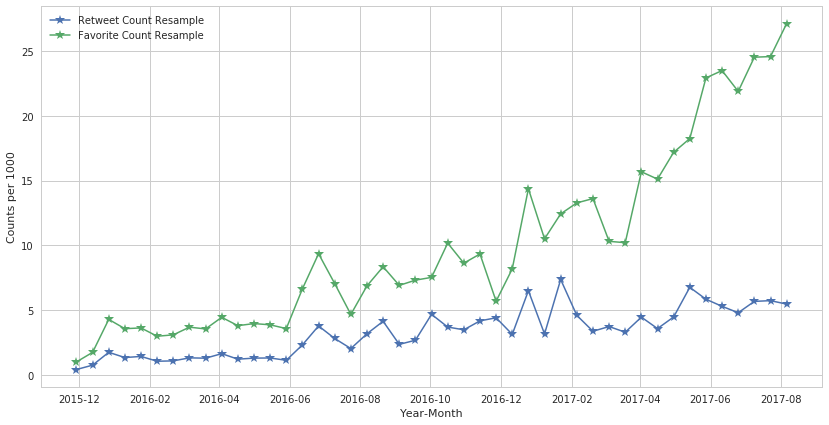

In [142]:
sns.set(rc={'figure.figsize':(14, 7)})
sns.set_style('whitegrid')

fig, ax = plt.subplots()
ax.plot(retweet_resamp/1000, marker='*', markersize=10, linestyle='-', linewidth=1.5, label='Retweet Count Resample')
ax.plot(favorite_resamp/1000, marker='*', markersize=10, linestyle='-', linewidth=1.5, label='Favorite Count Resample')

ax.set_ylabel('Counts per 1000')
ax.set_xlabel('Year-Month')
ax.legend();

The results show a clear upward trend for the favorite count as time went on. Retweets increased as well however the difference between favorites:retweets greatly increased as time went on.

#### Which source is used most

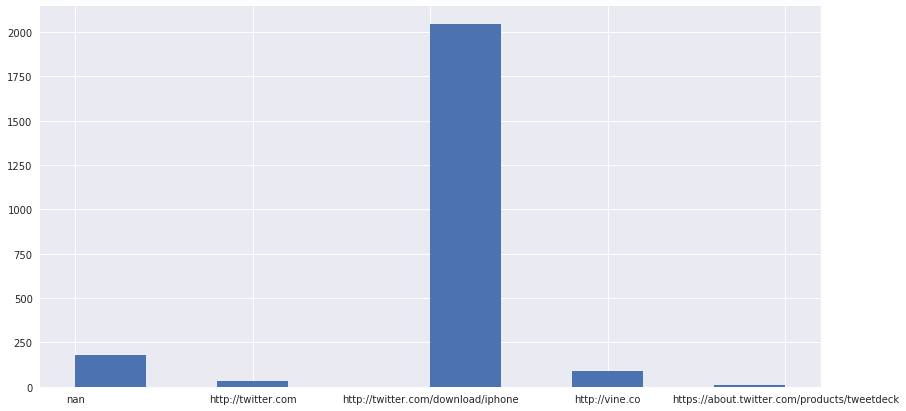

In [111]:
plt.hist(df_analysis.source, density=False);  # density=False makes counts

Twitter for iphone is used the most by far - more than two thousand tweets. This is followed by vine as the second highest known. However, there are many nan values. Further analysis should be done to see if these are another category i.e. twitter for andriod.